In [2]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('monthly-milk-production-pounds.csv')
df.head(10)

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
5,1962-06,697.0
6,1962-07,640.0
7,1962-08,599.0
8,1962-09,568.0
9,1962-10,577.0


In [6]:
df.shape

(169, 2)

In [7]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [10]:
df.drop(168, inplace=True)

In [11]:
df.tail(10)

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
158,1975-03,892.0
159,1975-04,903.0
160,1975-05,966.0
161,1975-06,937.0
162,1975-07,896.0
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


<AxesSubplot:>

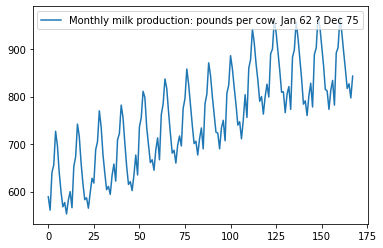

In [12]:
df.plot()

In [13]:
# fbpropphet requires date column as 'ds' and monthly milk production should be specified as the value 'y'
df.columns = ['ds', 'y']

In [14]:
df.columns

Index(['ds', 'y'], dtype='object')

In [15]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [16]:
# converting the 'ds' column to the datetime format
df['ds'] = pd.to_datetime(df['ds'])

In [17]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

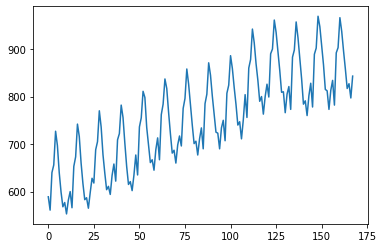

In [18]:
df['y'].plot()

#### it's clear that the data is seasonal so firstly we have to convert it into a stationary data in order to do it we will shift 'y' column one step downward using shift(y)

In [21]:
#first value will be nan and other values will be shifted downward & last value will be deleted

df['y'].shift(1)

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [22]:
# converting seasonal data into a stationary data
# this formula will subtract 561 from 589, 640 from 561 and so on...

df['y'] = df['y'] - df['y'].shift(1)

In [23]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


<AxesSubplot:>

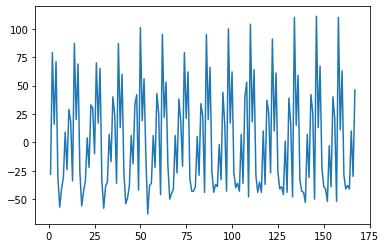

In [24]:
df['y'].plot()

<font color='red'><h4>(if seasonal data doesn't cenvert into stationary in one shifting then we have to shift it again)</h4></font>

In [25]:
# importing the fbprophet

from fbprophet import Prophet

In [26]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [27]:
# innitializing the model
model = Prophet()

In [28]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

### creating future dates for the forecasting

In [30]:
# creating future dates of 365 dates

future_dates = model.make_future_dataframe(periods=365)

In [33]:
future_dates #returns the dataframe of 365 days appended with the previous(main) dataset

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [34]:
# prediction for the future dates

prediction = model.predict(future_dates)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.042182,17.981335,35.790289,2.042182,2.042182,24.993781,24.993781,24.993781,24.993781,24.993781,24.993781,0.0,0.0,0.0,27.035963
1,1962-02-01,2.040434,-47.486013,-29.377634,2.040434,2.040434,-40.256153,-40.256153,-40.256153,-40.256153,-40.256153,-40.256153,0.0,0.0,0.0,-38.215718
2,1962-03-01,2.038855,86.126619,104.710396,2.038855,2.038855,93.019947,93.019947,93.019947,93.019947,93.019947,93.019947,0.0,0.0,0.0,95.058803
3,1962-04-01,2.037107,6.223378,25.233478,2.037107,2.037107,14.325807,14.325807,14.325807,14.325807,14.325807,14.325807,0.0,0.0,0.0,16.362914
4,1962-05-01,2.035416,53.182165,73.019487,2.035416,2.035416,60.543389,60.543389,60.543389,60.543389,60.543389,60.543389,0.0,0.0,0.0,62.578805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26,1.436223,2.977614,21.896727,1.435150,1.437292,11.403737,11.403737,11.403737,11.403737,11.403737,11.403737,0.0,0.0,0.0,12.839960
529,1976-11-27,1.436102,9.707496,28.132668,1.435027,1.437174,16.850402,16.850402,16.850402,16.850402,16.850402,16.850402,0.0,0.0,0.0,18.286504
530,1976-11-28,1.435981,14.302776,34.202709,1.434905,1.437057,22.429900,22.429900,22.429900,22.429900,22.429900,22.429900,0.0,0.0,0.0,23.865881
531,1976-11-29,1.435859,20.187314,38.678613,1.434776,1.436939,28.029723,28.029723,28.029723,28.029723,28.029723,28.029723,0.0,0.0,0.0,29.465583


In [36]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.042182,17.981335,35.790289,2.042182,2.042182,24.993781,24.993781,24.993781,24.993781,24.993781,24.993781,0.0,0.0,0.0,27.035963
1,1962-02-01,2.040434,-47.486013,-29.377634,2.040434,2.040434,-40.256153,-40.256153,-40.256153,-40.256153,-40.256153,-40.256153,0.0,0.0,0.0,-38.215718
2,1962-03-01,2.038855,86.126619,104.710396,2.038855,2.038855,93.019947,93.019947,93.019947,93.019947,93.019947,93.019947,0.0,0.0,0.0,95.058803
3,1962-04-01,2.037107,6.223378,25.233478,2.037107,2.037107,14.325807,14.325807,14.325807,14.325807,14.325807,14.325807,0.0,0.0,0.0,16.362914
4,1962-05-01,2.035416,53.182165,73.019487,2.035416,2.035416,60.543389,60.543389,60.543389,60.543389,60.543389,60.543389,0.0,0.0,0.0,62.578805


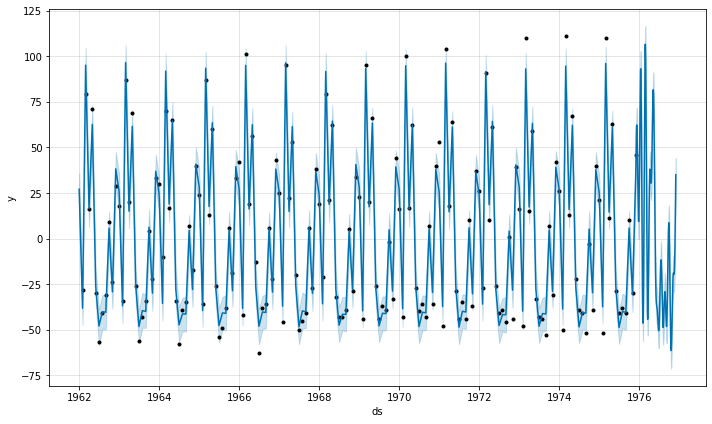

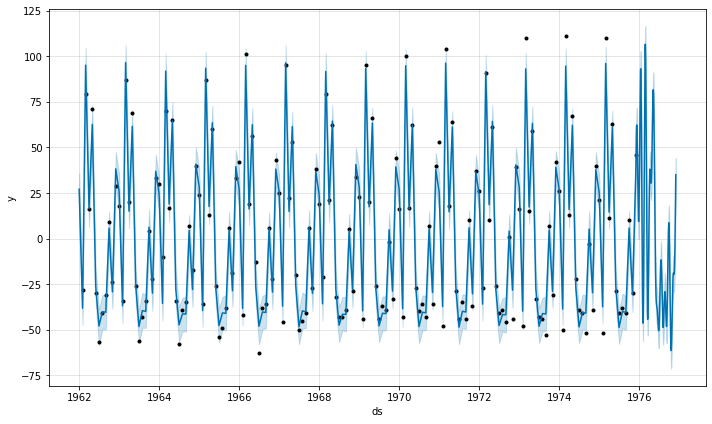

In [40]:
# plotting the graph for the predictions

model.plot(prediction)

#### Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

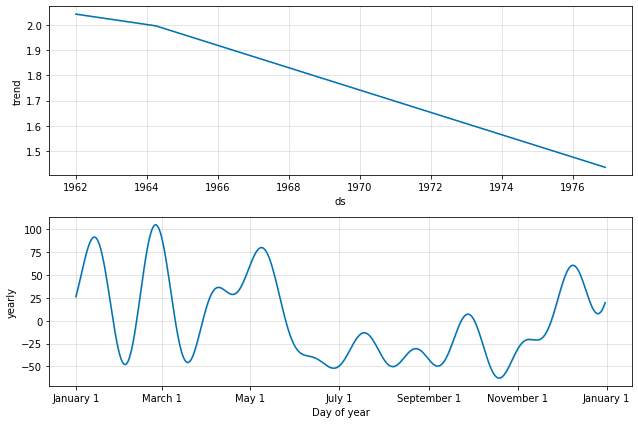

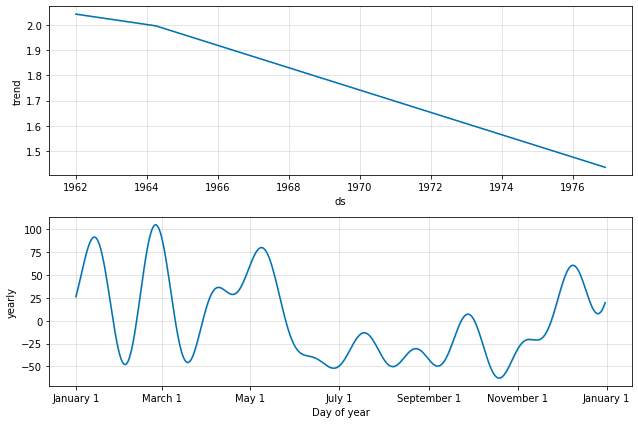

In [41]:
# Visualize Each Components[Trends,Weekly]

model.plot_components(prediction)

### Cross Validation

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [42]:
from fbprophet.diagnostics import cross_validation

In [43]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


In [45]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898372,-46.475095,-35.427723,-49.0,1965-07-21
1,1965-09-01,-34.869323,-40.280448,-29.560059,-38.0,1965-07-21
2,1965-10-01,6.103171,0.953717,11.808983,6.0,1965-07-21
3,1965-11-01,-20.281526,-25.568392,-15.047472,-19.0,1965-07-21
4,1965-12-01,36.035431,30.764244,41.736875,33.0,1965-07-21
...,...,...,...,...,...,...
235,1975-08-01,-40.700564,-49.725370,-31.957648,-38.0,1974-12-01
236,1975-09-01,-40.670091,-49.666834,-31.337821,-41.0,1974-12-01
237,1975-10-01,4.668816,-5.013444,13.527154,10.0,1974-12-01
238,1975-11-01,-30.753828,-39.565746,-21.622152,-30.0,1974-12-01


### Obtaining the Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [46]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,123.792144,11.126192,9.175195,0.263553,0.196377,0.458333
1,42 days,115.534936,10.748718,8.614513,0.233441,0.185216,0.541667
2,43 days,123.895577,11.130839,8.862266,0.227149,0.185216,0.541667
3,46 days,89.983302,9.485953,7.920485,0.214454,0.185216,0.583333
4,47 days,87.545158,9.356557,7.708478,0.210701,0.176906,0.604167


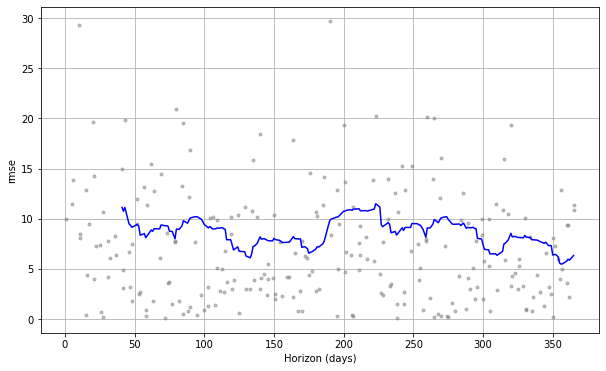

In [53]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')